1. [Búsqueda no Informada]. El siguiente rompecabezas es un juego para niños en el cual las piezas solo pueden
unirse en línea recta cambiándolas de lugar a través de tres operaciones permitidas por el juego. El objetivo
es lograr una configuración como la que se presenta a continuación:

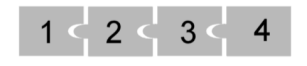


El estado inicial puede ser cualquier combinación posible de las cuatro piezas. Las operaciones permitidas
son:

- D: intercambiar dos piezas a la derecha
- C: intercambiar dos piezas en el centro
- I: intercambiar dos piezas en la izquierda

Tomando un estado inicial al azar y considerando las operaciones permitidas:

- A. Defina el juego como un problema de búsqueda

Definir el objetivo: El objetivo es un orden específico de las fichas, en este caso [1,2,3,4].

Especificar el problema: Los estados son las posibles combinaciones para cada estado, en este caso cada estado dispone de tres posibles configuraciones que son: Intercambiar dos piezas a la derecha, intercambiar dos piezas en el centro e intercambiar dos piezas a la izquierda.

Ejemplo:

Estado inicial 1: [3,1,4,2]
Estado 2: Intercambiar dos fichas a la derecha [3,1,2,4]
Estado 3: Intercambiar dos fichas en el centro [3,4,1,2]
Estado 4: Intercambiar dos fichas a la izquierda [1,3,4,2]

Definir que se considera una solución: Secuencia de números objetivo.

B. Construya el grafo del espacio de estados

El siguinte código construye el grafo del espacio de estados.
El estado inicial es [3,1,4,2] y el objetivo es llegar a la siguiente distribución [1,2,3,4].

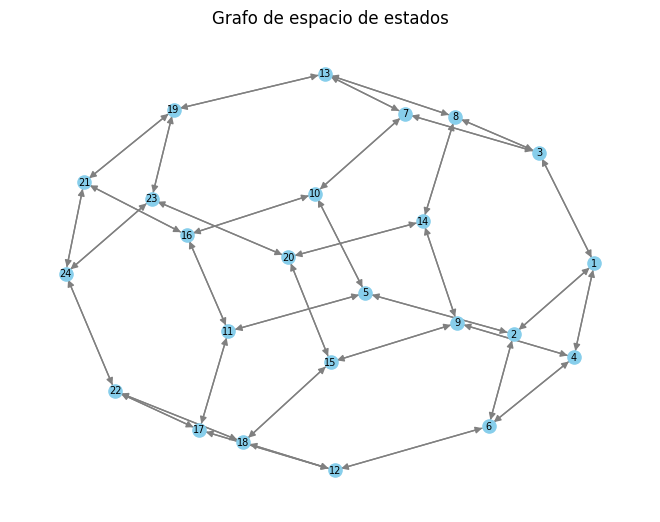

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.DiGraph()

# Agregar nodos
G.add_nodes_from(["1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24"])

# Agregar aristas (conexiones entre nodos)
G.add_edges_from([("1", "2"), ("1", "3"), ("1", "4"),("2", "5"),("2","6"),("2","1"),("3","7"),("3","8"),("3","1"),("4","1"),("4","9"),("4","6"),("5","2"),("5","10"),("5","11"),("6","2"),("6","4"),("6","12"),("7","3"),("7","10"),("7","13"),("8","3"),("8","13"),("8","14"),("9","4"),("9","14"),("9","15"),("10","5"),("10","7"),("10","16"),("11","5"),("11","16"),("11","17"),("12","6"),("12","17"),("12","18"),("13","7"),("13","8"),("13","19"),("14","8"),("14","9"),("14","20"),("15","9"),("15","18"),("15","20"),("16","10"),("16","21"),("16","11"),("17","11"),("17","12"),("17","22"),("18","12"),("18","22"),("18","15"),("19","21"),("19","23"),("19","13"),("20","14"),("20","15"),("20","23"),("21","16"),("21","19"),("21","24"),("22","17"),("22","18"),("22","24"),("23","19"),("23","20"),("23","24"),("24","21"),("24","22"),("24","23")])

# Dibujar el grafo
pos = nx.spring_layout(G)  # Algoritmo de distribución de nodos
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=90, font_size=7) # Imprime el grafo

# Mostrar el gráfico
plt.title("Grafo de espacio de estados")
plt.show()

C. ¿Cuál es el tamaño del espacio de estados para el juego?
- El espacio de estados es 24.

D. Construya el árbol de búsqueda y encuentre una solución al problema. ¿existe más de una solución?

- Si, existe más de una solucion al problema.

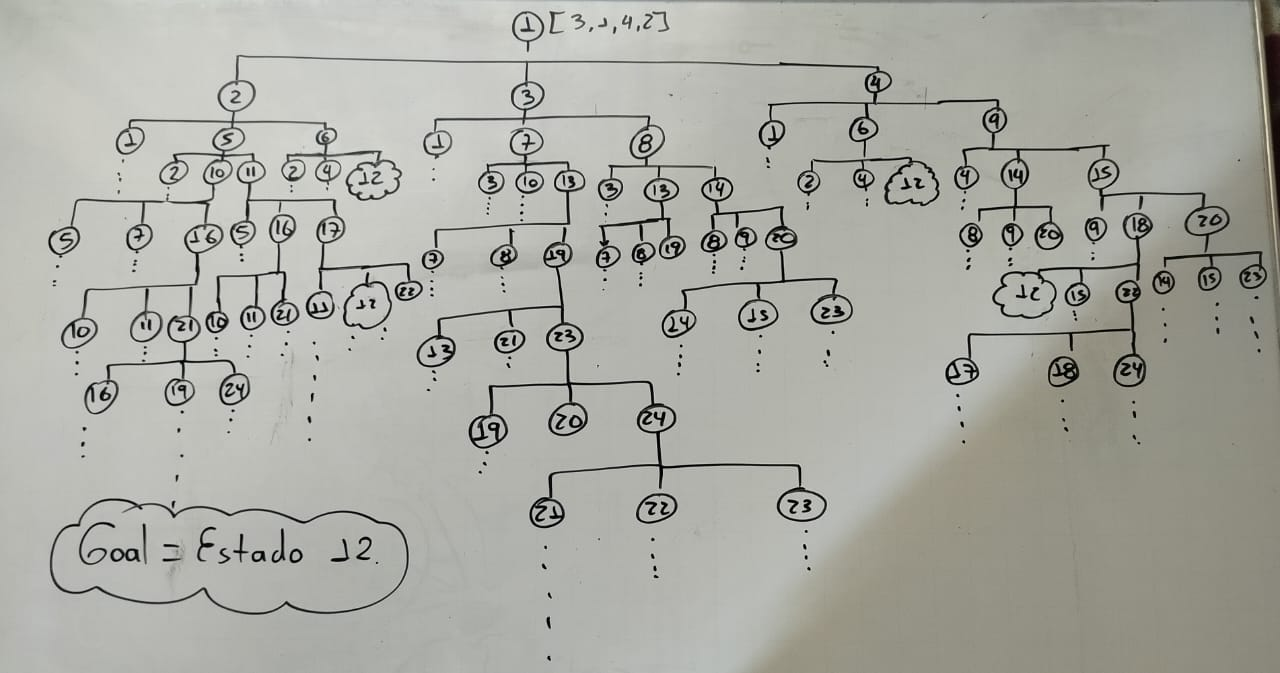

- Los puntos (....) suspensivos indican que el nodo ya se habrío anteriormente.

El siguiente cuadro expecifica la configuración de cada estado.


| Estado | Configuración del estado |
|------|------------------|
| 1   | [3 1 4 2]               |
| 2   | [1 3 4 2]               |
| 3   | [3 4 1 2]               |
| 4   | [3 1 2 4]               |
| 5   | [1 4 3 2]               |
| 6   | [1 3 2 4]               |
| 7   | [4 3 1 2]               |
| 8   | [3 4 2 1]               |
| 9   | [3 2 1 4]               |
| 10  | [4 1 3 2]               |
| 11  | [1 4 2 3]                |
| 12  | [1 2 3 4] (Estado objetivo)               |
| 13  | [4 3 2 1]               |
| 14  | [3 2 4 1]               |
| 15  | [2 3 1 4]               |
| 16  | [4 1 2 3]               |
| 17  | [1 2 4 3]               |
| 18  | [2 1 3 4]               |
| 19  | [4 2 3 1]               |
| 20  | [2 3 4 1]               |
| 21  | [4 2 1 3]               |
| 22  | [2 1 4 3]               |
| 23  | [2 4 3 1]               |
| 24  | [2 4 1 3]               |


E. Construya un programa en Python que permita encontrar una solución para cualquier estado inicial.
Recuerde que una solución será definida como la secuencia de acciones que nos llevará del estado inicial
al estado objetivo.

In [ ]:
import random
from collections import deque

class Agente:

    def __init__(self, estado_objetivo, estado_inicial=None):
        self.estado_objetivo = estado_objetivo
        self.estado_inicial = random.sample(estado_objetivo, len(estado_objetivo))
        print("Estado inicial:", self.estado_inicial)

    def mover_izquierda(self, estado):
        nuevo_estado = estado.copy()
        nuevo_estado[0], nuevo_estado[1] = nuevo_estado[1], nuevo_estado[0]
        return nuevo_estado

    def mover_centro(self, estado):
        nuevo_estado = estado.copy()
        nuevo_estado[1], nuevo_estado[2] = nuevo_estado[2], nuevo_estado[1]
        return nuevo_estado

    def mover_derecha(self, estado):
        nuevo_estado = estado.copy()
        nuevo_estado[2], nuevo_estado[3] = nuevo_estado[3], nuevo_estado[2]
        return nuevo_estado

    def generar_hijos(self, estado):
        return [self.mover_izquierda(estado),self.mover_centro(estado),self.mover_derecha(estado)]

    def buscar_objetivo(self):
        visitados = set() # Creación de conjunto vacío
        cola = deque() # Permite insertar y eliminar objetos por ambos extremos de forma eficiente
        cola.append((self.estado_inicial, [self.estado_inicial]))  # (estado, camino) # Agrega el estado actual y el camino recorrido hasta el momento


        while cola:
            estado_actual, camino = cola.popleft() # Elimina el primer elemento de la estructura deque y lo guarda en (estado_actual, camino)
            estado_str = str(estado_actual) # Crea un string de la lista (estado_actual)

            if estado_actual == self.estado_objetivo:
                print("***Estado objetivo encontrado***")
                for paso, estado in enumerate(camino): # Genera la enumeración de pasos para llegar al valor objetivo
                    print(f"Paso {paso}: {estado}")
                return #camino

            # if estado_str in visitados:
            #     continue

            visitados.add(estado_str) # Agrega al conjunto visitados, el estado actual

            hijos = self.generar_hijos(estado_actual) # Llama la función generar hijos y genera los hijos del estado actual

            for i in hijos:
                if str(i) not in visitados: # Verifica si el hijo se encuentra en el conjunto visitados y en caso de no estár lo agrega al conjunto cola
                    cola.append((i, camino + [i]))



objetivo = [1, 2, 3, 4]
agente = Agente(objetivo)
agente.buscar_objetivo()

Estado inicial: [4, 1, 3, 2]
***Estado objetivo encontrado***
Paso 0: [4, 1, 3, 2]
Paso 1: [1, 4, 3, 2]
Paso 2: [1, 3, 4, 2]
Paso 3: [1, 3, 2, 4]
Paso 4: [1, 2, 3, 4]


F. Genere una representación completa del árbol de búsqueda de forma automática (considere usar
NetworX)


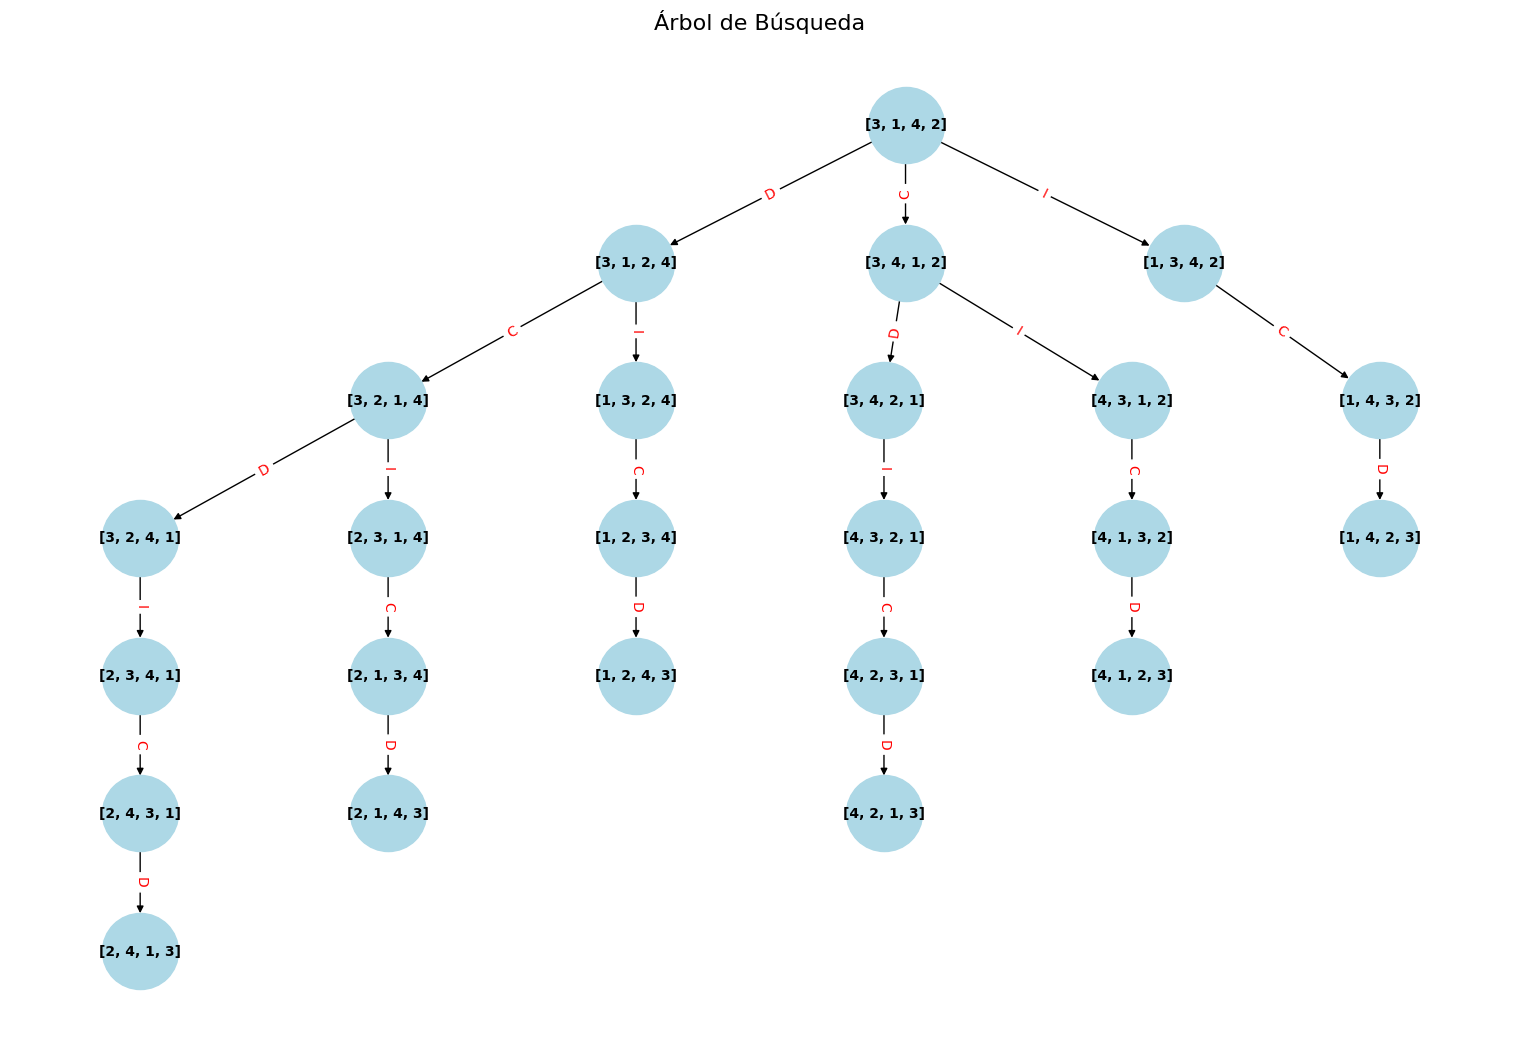

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class Nodo:
    def __init__(self, estado, padre=None, operacion=None):
        self.estado = estado
        self.padre = padre
        self.operacion = operacion
        self.hijos = []

def intercambiar_elementos(lista, pos1, pos2):
    """Crea una nueva lista con dos elementos intercambiados."""
    nueva_lista = list(lista)
    nueva_lista[pos1], nueva_lista[pos2] = nueva_lista[pos2], nueva_lista[pos1]
    return nueva_lista

def construir_arbol(estado_inicial, profundidad_max):
    """Construye el árbol de búsqueda a partir de un estado inicial."""
    raiz = Nodo(estado_inicial)
    cola = [(raiz, 0)]  # Usamos una cola para búsqueda en amplitud
    visitados = {tuple(estado_inicial)}

    # Se crea un grafo dirigido
    arbol = nx.DiGraph()
    arbol.add_node(str(estado_inicial))

    while cola:
        nodo_actual, profundidad = cola.pop(0)
        estado_actual = nodo_actual.estado

        if profundidad >= profundidad_max:
            continue

        # Generar hijos aplicando las reglas
        hijos_generados = []

        # Operación D: intercambiar dos piezas a la derecha (posiciones 2 y 3)
        nuevo_estado_D = intercambiar_elementos(estado_actual, 2, 3)
        if tuple(nuevo_estado_D) not in visitados:
            hijos_generados.append((nuevo_estado_D, 'D'))
            visitados.add(tuple(nuevo_estado_D))

        # Operación C: intercambiar dos piezas en el centro (posiciones 1 y 2)
        nuevo_estado_C = intercambiar_elementos(estado_actual, 1, 2)
        if tuple(nuevo_estado_C) not in visitados:
            hijos_generados.append((nuevo_estado_C, 'C'))
            visitados.add(tuple(nuevo_estado_C))

        # Operación I: intercambiar dos piezas en la izquierda (posiciones 0 y 1)
        nuevo_estado_I = intercambiar_elementos(estado_actual, 0, 1)
        if tuple(nuevo_estado_I) not in visitados:
            hijos_generados.append((nuevo_estado_I, 'I'))
            visitados.add(tuple(nuevo_estado_I))

        for nuevo_estado, operacion in hijos_generados:
            hijo = Nodo(nuevo_estado, padre=nodo_actual, operacion=operacion)
            nodo_actual.hijos.append(hijo)
            cola.append((hijo, profundidad + 1))

            # Agregar el nodo y la arista al grafo de NetworkX
            arbol.add_node(str(nuevo_estado))
            arbol.add_edge(str(estado_actual), str(nuevo_estado), label=operacion)

    return arbol

def graficar_arbol(arbol):
    """Grafica el árbol de búsqueda usando NetworkX y Matplotlib."""
    pos = nx.drawing.nx_pydot.graphviz_layout(arbol, prog='dot')
    labels = nx.get_edge_attributes(arbol, 'label')

    plt.figure(figsize=(15, 10))

    # Dibuja los nodos y las aristas
    nx.draw(arbol, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')

    # Dibuja las etiquetas de las aristas
    nx.draw_networkx_edge_labels(arbol, pos, edge_labels=labels, font_color='red')

    plt.title('Árbol de Búsqueda', fontsize=16)
    plt.show()

# Estado inicial del problema
estado_inicial = [3, 1, 4, 2]
# Profundidad máxima del árbol para evitar un crecimiento infinito
profundidad_maxima = 24

# Construir y graficar el árbol
arbol_generado = construir_arbol(estado_inicial, profundidad_maxima)
graficar_arbol(arbol_generado)



2. Para el siguiente grafo de búsqueda encuentre la solución utilizando los algoritmos de UCS, voraz y A*.
Construya un cuadro comparativo donde presente: la ruta entregada por cada algoritmo, la cantidad de
nodos expandidos, la cantidad de nodos en la ruta solución y el costo de la ruta solución.

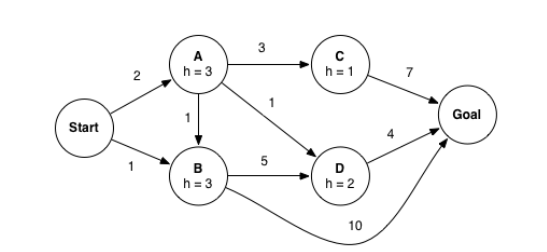

Búsqueda de costo uniforme (UCS)

Movimiento al nodo adyacente que en su recorrido tenga menor ganancia, es decir que se suma la ganancia de todo su trayecto.

$$
\begin{array}{|c|c|c|c|c|}
\hline
\begin{array}{c}\textbf{Tipo de}\\\textbf{búsqueda}\end{array} & \textbf{Ruta entregada} & \textbf{Nodos expandidos} & \textbf{Nodos solución} & \begin{array}{c}\textbf{costo}\end{array} \\
\hline
 & S(0)-->A(g=2) -- B(g=1) &  &  &  \\
 & B(g=1)--> D(g=1+5=6) -- Goal(g=1+10=11) &  &  &  \\
 UCS & A(g=2)--> B(g=2+1=3) -- C(g=2+3=5) -- D(g=2+1=3) & 5 & S --> A --> D --> Goal  & 7 \\
 & D(g=3)--> Goal(g=3+4=7) &  & &  \\
 & C(g=5)--> Goal(g=5+7=12) &  & &  \\
\hline
\end{array}
$$

Movimientos a donde se encuentre la menor heurística

$$
\begin{array}{|c|c|c|c|c|}
\hline
\begin{array}{c}\textbf{Tipo de}\\\textbf{búsqueda}\end{array} & \textbf{Ruta entregada} & \textbf{Nodos expandidos} & \textbf{Nodos solución} & \begin{array}{c}\textbf{costo}\end{array} \\
\hline
 & S(0)-->A(h=3) -- B(h=3) &  &  &  \\
Voraz & A(h=3)--> B(h=3) -- C(h=1) -- D(h=2) & 3 & S-->A-->C-->Goal & 12 \\
 & C(h=1)--> Goal &  &  &   \\
\hline
\end{array}
$$

Búsqueda A*

Teniendo en cuenta que esta búsqueda suma los valores de ganancia (g) y heurística (h) tenemos:

f(n)=g(n)+h(n)

g(n)= Ganancia sumada (sumatoria de los costos del camino recorrido hasta e nodo)

h(n)= Heurística loca de cada nodo

$$
\begin{array}{|c|c|c|c|c|}
\hline
\begin{array}{c}\textbf{Tipo de}\\\textbf{búsqueda}\end{array} & \textbf{Ruta entregada} & \textbf{Nodos expandidos} & \textbf{Nodos solución} & \begin{array}{c}\textbf{costo}\end{array} \\
\hline
 & S(0)-->A(f=2+3=5) -- B(f=1+3=4) &  &  &  \\
 & B(f=4)--> D(f=6+2=8) -- Goal(f=11+0=11) &  &  &  \\
 A* & A(f=5)--> C(f=5+1=6) -- D(f=3+2=5) & 4 & S --> A --> D --> Goal  & 7 \\
 & D(f=5)--> Goal(f=7+0=7) &  & &  \\
 &  &  & &  \\
\hline
\end{array}
$$

- Comparación algoritmos de búsqueda (UCS vs Voraz vs A*)

$$
\begin{array}{|c|c|c|c|c|}
\hline
\begin{array}{c}\textbf{Tipo de}\\\textbf{búsqueda}\end{array} & \textbf{Nodos expandidos} & \textbf{Nodos solución} & \begin{array}{c}\textbf{costo}\end{array} \\
\hline
 UCS & 5 & S-->A-->D-->Goal  & 7 \\
Voraz &  3 & S-->A-->C-->Goal & 12 \\
A* & 4  & S-->A-->D-->Goal &  7 \\
\hline
\end{array}
$$

- Se puede evidenciar que el algoritmo voraz, expande menos nodos que los demás pero su costo es mayor, esto puede ser porque el voraz se basa únicamente en la heurística más no en el costo.
- Los algoritmos UCS y A* tienen el mismo costo y la misma secuencia de solución pero el A* expande menos nodos, esto porque el A* en su fución tienen en cuenta la heurística y esta cualidad le otorga llegar al nodo final y dejar de buscar a diferencia que el algoritmo UCS que aún llegando al nodo objetivo puede seguir expandiendo nodos con menor costo hasta encontrar la ruta con menor costo.
- El algoritmo voraz es el que posee mayor costo de los tres.

3. Considere la siguiente habitación en la cual un jugador se encuentra ubicado en la posición C y desea
encontrar una llave para poder escapar. El jugador puede moverse a cualquiera de los cuadros adyacentes
(siempre que permanezca dentro del laberinto). Asuma que los costos de moverse en diagonal son de 3
puntos mientras el costo de moverse arriba, abajo, izquierda o derecha es de 1 punto. Encuentre la solución
al problema utilizando los algoritmos de UCS, Voraz y A*(con la distancia de Manhattan como heurística). Si
tiene empates a la hora de seleccionar un nodo de la frontera, siga el orden alfabético. Genere un cuadro
comparativo al igual que en el punto anterior


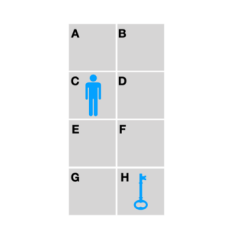

Teniendo en cuenta los siguiente:

- Los movimientos a la derecha, izquierda, arriba o abajo tienen un costo de g=1
- Movimientos en diagonal tienen un costo de g=3
- Desempate se realiza por orden alfabético

$$
\begin{array}{|c|c|c|c|c|}
\hline
\begin{array}{c}\textbf{Tipo de}\\\textbf{búsqueda}\end{array} & \textbf{Ruta entregada} & \textbf{Nodos expandidos} & \textbf{Nodos solución} & \begin{array}{c}\textbf{costo}\end{array} \\
\hline
 & C(0)-->A(g=1) -- B(g=3) -- D(g=1) -- E(g=1) -- F(g=3) &  &  &  \\
 & A(g=1)--> B(g=1+1=2) -- D(g=1+3=4) &  &  &  \\
 & D(g=1)--> A(g=1+3=4) - B(g=1+1=2) - E(g=1+3=4) - F(g=1+1=2) &  &  &  \\
UCS & E(g=1)--> D(g=1+3=4) - F(g=1+1=2) - G(g=1+1=2) - H(g=1+3=4) & 6 & C-->E-->G-->H & 3  \\
 & B(g=2)--> D(g=2+1=3) &  & C-->D-->F-->H & 3 \\
 & F(g=2)--> E(g=2+1=3) -- G(g=2+3=5) -- H(g=2+1=3) &  & &  \\
 & G(g=2)--> F(g=2+3=5) -- H(g=2+1=3) -- H(g=2+1=3) &  & &  \\
\hline
\end{array}
$$

- El algoritmo de búsqueda de costo uniforme (UCS) en este caso da como resultado dos caminos con el mismo costo.

Para implementar el algoritmo de búsqueda voraz debemos definir la heurística correspondiente. Para este ejemplo se utilizará la heurística de Manhattan, por lo cuál, los movimientos en diagonal no serán tenidos en cuenta. La heurística de Manhattan indica que el valor de heurística para cada casilla es el número de casillas que separan a cada nodo del objetivo (H). Teniendo en cuenta esto, los valores de heurística para cada nodo serán los siguientes:

$$
\begin{array}{|c|c|c|c|c|}
\hline
\begin{array}{c}\textbf{Nodo}\end{array} & \textbf{Valor heurística h(n)}\\
\hline
A & 4\\
B & 3\\
C & 3 \\
D &  2   \\
E &   2  \\
F &   1  \\
G &   1  \\
H &   0  \\
\hline
\end{array}
$$

$$
\begin{array}{|c|c|c|c|c|}
\hline
\begin{array}{c}\textbf{Tipo de}\\\textbf{búsqueda}\end{array} & \textbf{Ruta entregada} & \textbf{Nodos expandidos} & \textbf{Nodos solución} & \begin{array}{c}\textbf{costo}\end{array} \\
\hline
 & C(0)-->A(h=4) -- D(h=2) -- E(h=2) &  &  &  \\
Voraz & D(h=2)--> B(h=3) -- F(h=1) & 3 & C-->D-->F-->H & 3 \\
 & F(h=1)--> H(h=0)  &  \\
\hline
\end{array}
$$

Para implementar el algoritmo de busqueda A* debemos recordar que este combina la ganancia g del algoritmo de UCS y la heurística h del algoritmo voraz la cuál sera la heurística de Manhattan. Por lo tanto, los movimientos en diagonal no serán tenidos en cuenta para este ejemplo.

f(n)=g(n)+h(n)


$$
\begin{array}{|c|c|c|c|c|}
\hline
\begin{array}{c}\textbf{Tipo de}\\\textbf{búsqueda}\end{array} & \textbf{Ruta entregada} & \textbf{Nodos expandidos} & \textbf{Nodos solución} & \begin{array}{c}\textbf{costo}\end{array} \\
\hline
 & C(0)-->A(f=1+4) -- D(f=1+2=3) -- E(f=1+2=3) &  &  &  \\
 & D(f=3)--> B(f=2+3=5) -- F(f=2+1=3) &  &  &  \\
 A* & E(f=3)--> F(f=2+1=3) -- G(f=2+1=3) & 4 & C --> D -->E--> F --> H  & 3 \\
 & F(f=3)--> H(f=3+0=3) &  & &  \\
   \\
\hline
\end{array}
$$



Comparación algoritmos de búsqueda (UCS vs Voraz vs A*)

$$
\begin{array}{|c|c|c|c|c|}
\hline
\begin{array}{c}\textbf{Tipo de}\\\textbf{búsqueda}\end{array} & \textbf{Nodos expandidos} & \textbf{Nodos solución} & \begin{array}{c}\textbf{costo}\end{array} \\
\hline
 UCS & 6 & C-->E-->G-->H  & 3 \\
 UCS & 6 & C-->D-->F-->H  & 3 \\
Voraz &  3 & C-->D-->F-->H & 3 \\
A* & 4  & C-->D-->E-->F-->H &  3 \\
\hline
\end{array}
$$

- El algoritmo de UCS posee dos rutas con el mismo costo.
- El algoritmo que menos nodos expande para este ejemplo, lo cuál se traduce en menos memoria es el voraz.
- Se evidencia que casualmente una solución del algoritmo UCS es igual a la solución del algoritmo Voraz.
- El algoritmo A* para este ejemplo posee la ruta más larga.

- El costo de los tres algoritmos para este ejemplo es el mismo (no siempre poseen el mismo costo).

4. Considerando el mismo problema de la habitación propuesto en el punto tres, proponga heurísticas que
cumplan las condiciones requeridas. Puede utilizar las heurísticas utilizadas usualmente en clase o proponer
los valores directamente a los estados.

Para resolver el mismo ejercicio, se plantean las siguientes heurísticas:

- Si hay empate en h, se abrirá el nodo más cercano al objetivo H incluyendo la diagonal. En caso de persistir empate, se abrirá en orden alfabético.
- Si dos nodos tienen el mismo valor de f(n), abrirá el nodo con la ruta más corta.
- Para calcular los valores de heurística de cada nodo, se dará un valor de 3 a un movimiento en diagonal, ya que el primer movimiento de cada nodo será en diagonal. Cuando un nodo tenga dos movimientos en diagonal, se abrirá al nodo más cerca del objetivo. Ejemplo el nodo A: Primer movimiento diagonal al nodo D y después sus movimientos se harán respecto a la distancia Manhattan hacia el nodo F y el nodo H, siguiendo la siguiente secuencia: A-->D(3)-->F(1)-->H(1) y su valor de heurística será h=3+1+1=5. Así se calculará la heurística de cada nodo.


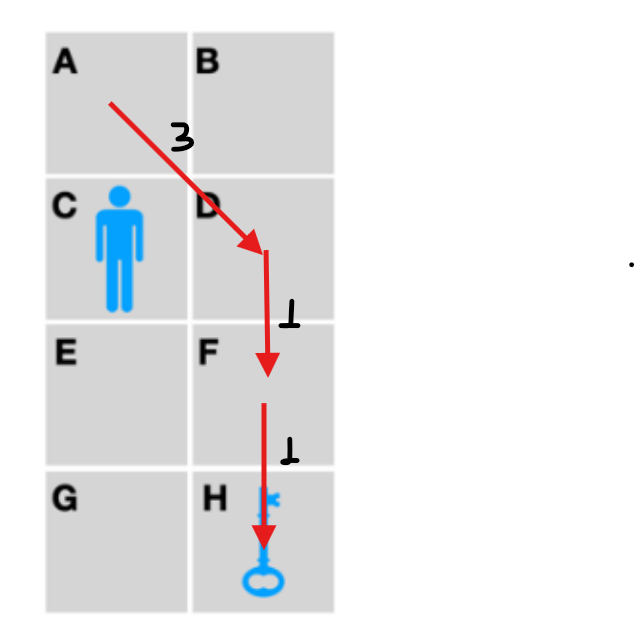



$$
\begin{array}{|c|c|c|c|c|}
\hline
\begin{array}{c}\textbf{Nodo}\end{array} & \textbf{Valor heurística h(n)}\\
\hline
A & 5\\
B & 6\\
C & 4 \\
D &  5   \\
E &   3  \\
F &   4  \\
G &   4  \\
H &   0  \\
\hline
\end{array}
$$



$$
\begin{array}{|c|c|c|c|c|}
\hline
\begin{array}{c}\textbf{Tipo de}\\\textbf{búsqueda}\end{array} & \textbf{Ruta entregada} & \textbf{Nodos expandidos} & \textbf{Nodos solución} & \begin{array}{c}\textbf{costo}\end{array} \\
\hline
 & C(0)-->A(g=1) -- D(g=1) -- E(g=1) -- F(g=3) &  &  &  \\
 & E(g=1)--> F(g=1+1=2) -- G(g=1+1=2) -- H(g=1+3=4) &  &  &  \\
UCS & D(g=1)--> F(g=1+1=2) -- E(g=1+3=4)  & 6 & C-->D-->F-->H & 3 \\
 & A(g=1)--> B(g=1+1=2) -- D(g=1+3=4)  &  & C-->E-->F-->H & 3 \\
 & F(g=2)--> G(g=2+3=5) -- H(g=2+1=3)  & & \\
 & B(g=2)--> D(g=2+3) &  \\
\hline
\end{array}
$$

$$
\begin{array}{|c|c|c|c|c|}
\hline
\begin{array}{c}\textbf{Tipo de}\\\textbf{búsqueda}\end{array} & \textbf{Ruta entregada} & \textbf{Nodos expandidos} & \textbf{Nodos solución} & \begin{array}{c}\textbf{costo}\end{array} \\
\hline
 & C(0)-->A(h=4) -- D(h=2) -- E(h=2) &  &  &  \\
Voraz & D(h=2)--> B(h=3) -- F(h=1) & 3 & C-->D-->F-->H & 3 \\
 & F(h=1)--> H(h=0)  &  \\
\hline
\end{array}
$$

$$
\begin{array}{|c|c|c|c|c|}
\hline
\begin{array}{c}\textbf{Tipo de}\\\textbf{búsqueda}\end{array} & \textbf{Ruta entregada} & \textbf{Nodos expandidos} & \textbf{Nodos solución} & \begin{array}{c}\textbf{costo}\end{array} \\
\hline
 & C(0)-->A(f=1+5=6) -- D(f=1+5=6) -- E(f=1+3=4) -- F(f=3+4=7) &  &  &  \\
A* & E(f=4)-->D(f=4+5=9)--F(f=2+4=6)--G(f=2+4=6)--H(f=4+0=4) & 2 & C-->E-->H & 4 \\
\hline
\end{array}
$$

Comparación algoritmos de búsqueda (UCS vs Voraz vs A*)

$$
\begin{array}{|c|c|c|c|c|}
\hline
\begin{array}{c}\textbf{Tipo de}\\\textbf{búsqueda}\end{array} & \textbf{Nodos expandidos} & \textbf{Nodos solución} & \begin{array}{c}\textbf{costo}\end{array} \\
\hline
 UCS & 6 & C-->E-->F-->H  & 3 \\
 UCS & 6 & C-->D-->F-->H  & 3 \\
Voraz &  3 & C-->D-->F-->H & 3 \\
A* & 2  & C-->E-->H &  4 \\
\hline
\end{array}
$$



Según las heurísticas agregadas, al resolver nuevamente el ejercicio se tienen las siguientes conclusiones:

- El algoritmo de búsqueda más rápido es el A*, ya que solo expande dos nodos pero es el que mayor costo genera.

- El algoritmo de búsqueda UCS tiene dos soluciones con el mismo costo.

- El algoritmo voraz posee una solución la cuál es igual a una de las soluciones del algoritmo UCS con el mismo costo pero el algoritmo UCS expande 6 nodos y esto se traduce en mayor gasto de memoria y tiempo, ya que expande practicamente todos los nodos para evaluar la o las soluciones con menor costo.